In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:

# 1. Load Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Class Names:", iris.target_names)
# Output: ['setosa' 'versicolor' 'virginica']
# 0 = setosa, 1 = versicolor, 2 = virginica


Class Names: ['setosa' 'versicolor' 'virginica']


In [94]:

# 2. EDA
# YOUR CODE HERE (shape, head, info, null check, duplicates, target distribution)
df.head()
df.shape
df.info()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df['species'].value_counts()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
# 3. Separate Features and Target
# YOUR CODE HERE
x = df.drop('species',axis=1)
y = df['species']


In [96]:

# 4. Split Data (80% train, 20% test, random_state=42)
# YOUR CODE HERE
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)



In [97]:
# 5. Scale Features
# YOUR CODE HERE
scaler = StandardScaler()

numerical = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

x_train[numerical]=scaler.fit_transform(x_train[numerical])
x_test[numerical]=scaler.transform(x_test[numerical])





In [98]:
# 6. Train Model
# YOUR CODE HERE

model = LogisticRegression()

model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [99]:

# 7. Predict
# YOUR CODE HERE
y_pred = model.predict(x_test)


In [100]:

# 8. Evaluate (accuracy, confusion matrix, classification report)
# YOUR CODE HEREy_pred
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")
print(f"Confusion matrix: {confusion_matrix(y_test,y_pred)}")
print(f" classification report: {classification_report(y_pred,y_test)}")
cm = confusion_matrix(y_test,y_pred)


Accuracy: 100.0%
Confusion matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



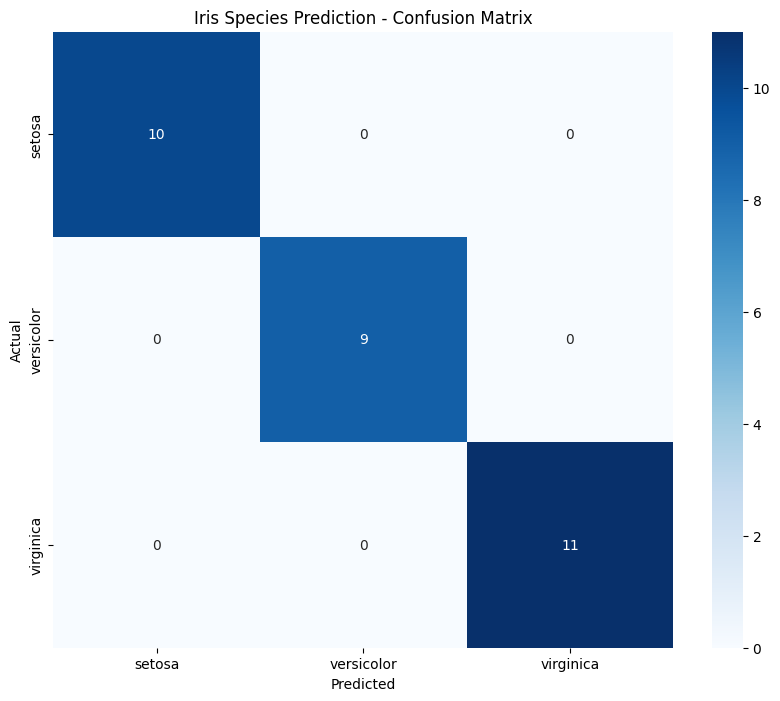

In [101]:

# 9. Visualize Confusion Matrix (3x3 for 3 classes!)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Iris Species Prediction - Confusion Matrix')
plt.show()